## Urban-Heat-Island-Effekt Quantifizierung mittels Zeitreihenanalyse, Berlin

> author: Anna-Lena Thran und Mira Pruß
> 
> area: in Berlin (Dahlem) und Brandenburg (Angermünde)
> 
> date: 26.08.2024

### Einleitung

Die Auswirkungen des Klimawandel sind bereits heute in allen Regionen der Welt zu spüren. Wetter- und Klimaextreme wie langanhaltene Hitzeperioden führen zu negativen Auswirkungen, z.B. auf die Ernährungssicherheit, die Wasserversorgung oder die menschliche Gesundheit (Calvin et al 2023). Der Anteil der Bevölkerung, der in städtischen Gebieten lebt, ist in den letzten Jahrzehnten stetig gewachsen. Im Jahr 2020 lebte fast die Hälfte der Weltbevölkerung in Städten. Neben den Herausforderungen durch den Klimawandel ergeben sich also auch durch die Urbanisierung vielfältige wirtschaftliche, soziale und ökologische Herausforderungen (World Cities Report 2022).

Bei der Untersuchung der thermischen Verhältnisse in urbanen Gebieten lässt sich das Phänomen der städtischen Wärmeinsel feststellen (Urban Heat Island, kurz UHI). Die erhöhte Bebauungsdichte, eine größere thermische Masse der Baumaterialien, eine reduzierte Vegetationsbedeckung sowie veränderte Windströmungsmuster führen in städtischen Gebieten im Vergleich zu ländlichen Regionen zu höheren Temperaturen (Rizwan et al., Oke 1973, Wilby 2003). Die Gefahrenlage bei Hitzewellen ist demzufolge in Städten intensiviert. 

Mithilfe von meteorologischen Daten des Deutschen Wetterdienstes (DWD) möchten wir herausfinden, ob der UHI-Effekt in der vergleichenden Betrachtung von Berlin als städtisches Gebiet und Angermünde (Brandenburg) als ländliches Gebiet zu beobachten ist. Hieraus ergeben sich folglich zwei Forschungsfragen: 

1. **Inwieweit lässt sich der UHI-Effekt mithilfe von Temperaturdaten von 2023 an den Wetterstationen Berlin Dahlem und Angermünde erkennen?**

2. **In welchen Monaten ist der UHI-Effekt besonders sichtbar?**


### Methode

Für die Beantwortung der Forschungsfragen werden nachfolgend die nötigen Schritte der Datenverarbeitung und Analyse erläutert. 

Wofür die nachfolgenden Paketinstallation genutzt werden:
1. pandas: Strukturierung, Manipulation und Analyse der Daten 
2. matpilot: Möglichkeit zur interaktiven Anpassung der Datenvisualsierung
3. seaborn: ansprechender Datenvisualierung (aufbauend auf matpilot)

In [1]:
#Importieren der Pakete
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Nutzung der Standartvorgaben von Seaborn und Festlegung der Standart Tabellen/ Grafikgröße
sns.set(rc={'figure.figsize':(11, 4)})

#### Datenvorbereitung

Der DWD liefert die Daten als Textdatei, für die Analyse benötigen wir die Datei im CSV Format. 

##### Datenvorbereitung Dahlem 

In [3]:
#Dahlem Stations ID 403

#Textdatei in CSV-Datei umwandeln (einmalig)
#with open('C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230116_20240718_00403.txt', 'r') as file:
#inhalt = file.read()
    
#eingabedatei = 'C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230116_20240718_00403.txt'
#ausgabedatei = 'C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230116_20240718_00403.csv'

#df = pd.read_csv(eingabedatei, sep=',')
#df.to_csv(ausgabedatei, index=False)
#print(f'Die Datei wurde erfolgreich als {ausgabedatei} gespeichert.')

#Daten einlesen:
df = pd.read_csv('C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230113_20240715_00403.csv', sep = ';',skipinitialspace=True)

#Spalten löschen
df = df.drop(columns=['STATIONS_ID','QN_3','FX','FM','QN_4','RSK','RSKF','SDK','SHK_TAG','NM','VPM','PM','UPM','TXK','TNK','TGK','eor'])
             
#Spalten umbenennen
df.columns = ['Date','Temp_Mean']

#Datum als Index umformatieren
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d') 
df = df.set_index('Date')

#Daten nach Datum sortieren
df = df.sort_values(by=['Date'], ascending = True)
             
#Das Jahr 2023 extrahieren 13.01.2023 - 31.12.2023
Dahlem = df['2023-01-13':'2023-12-31']
             
#auf NAs kontrollieren
Dahlem.isnull().sum(), Dahlem


(Temp_Mean    0
 dtype: int64,
             Temp_Mean
 Date                 
 2023-01-13        9.0
 2023-01-14        7.3
 2023-01-15        6.3
 2023-01-16        4.7
 2023-01-17        2.5
 ...               ...
 2023-12-27        4.0
 2023-12-28        8.4
 2023-12-29        9.5
 2023-12-30        6.1
 2023-12-31        5.9
 
 [353 rows x 1 columns])

##### Erläuterung zur Auswahl des Temperaturparameters: 
Um die beiden Zeitreihen im Hinblick auf den UHI-Effekt zu untersuchen, wird im weiteren Verlauf nur die Durchschnittstemperatur verwendet. Diese ist im Vergleich zur Maximaltemperatur weniger anfällig für mikroskalige Parameter (direkte Umgebung mit oder ohne Vegetation, Bebauung, Windverhältnisse etc.), die die Aufnahme der Wetterstationen beeinflussen könnten, denn der UHI-Effekt findet klimatisch gesehen, auf der Mesoskala und nicht auf der Mikroskala statt (Oke et al. 2017). 


##### Datenvorbereitung Angermünde

In [5]:
#Angermünde Stations ID 164

#Textdatei in CSV-Datei umwandeln (einmalig)
#with open('C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230116_20240718_00164.txt', 'r') as file:
#inhalt = file.read()
    
#eingabedatei = 'C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230116_20240718_00164.txt'
#ausgabedatei = 'C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230116_20240718_00164.csv'

#df = pd.read_csv(eingabedatei, sep=',')
#df.to_csv(ausgabedatei, index=False)
#print(f'Die Datei wurde erfolgreich als {ausgabedatei} gespeichert.')

#Daten einlesen
df = pd.read_csv('C:/Users/anna-/OneDrive/Desktop/Studium/6. Semester/KI/Zeitreihenanalyse/Hausarbeit/produkt_klima_tag_20230113_20240715_00164.csv', sep = ';',skipinitialspace=True)

#Spalten löschen
df = df.drop(columns=['STATIONS_ID','QN_3','FX','FM','QN_4','RSK','RSKF','SDK','SHK_TAG','NM','VPM','PM','UPM','TXK','TNK','TGK','eor'])
             
#Spalten umbenennen
df.columns = ['Date','Temp_Mean']

#Datum als Index umformatieren
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d') 
df = df.set_index('Date')

#nach Datum sortieren
df = df.sort_values(by=['Date'], ascending = True)
             
#Das Jahr 2023 extrahieren 13.01.2023 - 31.12.2023
Angermünde = df['2023-01-13':'2023-12-31']
             
#auf NAs kontrollieren
Angermünde.isnull().sum(), Angermünde


(Temp_Mean    0
 dtype: int64,
             Temp_Mean
 Date                 
 2023-01-13        8.7
 2023-01-14        7.0
 2023-01-15        6.5
 2023-01-16        4.4
 2023-01-17        2.3
 ...               ...
 2023-12-27        3.4
 2023-12-28        7.9
 2023-12-29        8.6
 2023-12-30        5.9
 2023-12-31        5.0
 
 [353 rows x 1 columns])

### 2.2. Visualisierung der Zeitreihen

<Axes: xlabel='Date'>

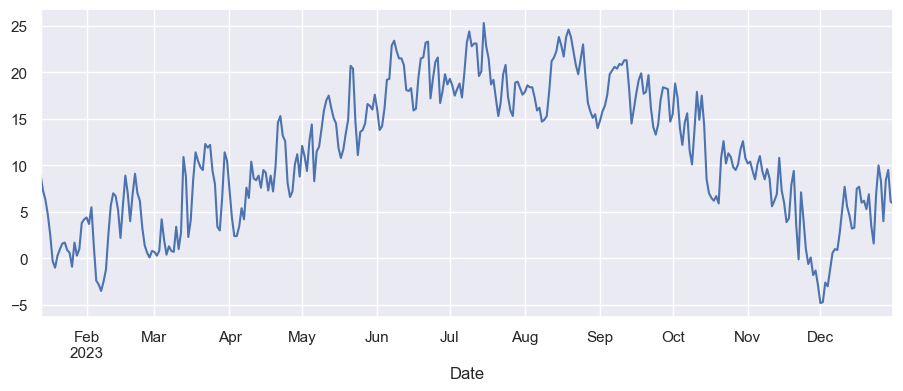

In [7]:
#Visualisierung der Daten in eine Grafik
Dahlem['Temp_Mean'].plot()

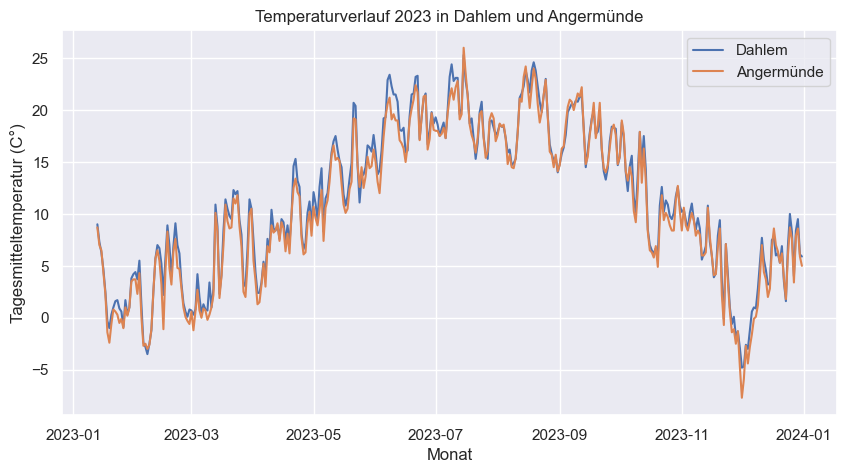

In [9]:
# Gemeinsame Darstellung der beiden Zeitreihen und Steigerung der Grafikinformationen
# Erstellen eines neuen Plots mit der Festlegung der Größe der Grafik
plt.figure(figsize=(10, 5))

# Plotten der ersten Zeitreihe (Dahlem)
plt.plot(Dahlem.index, Dahlem['Temp_Mean'], label='Dahlem')

# Plotten der zweiten Zeitreihe (Angermünde)
plt.plot(Angermünde.index, Angermünde['Temp_Mean'], label='Angermünde')

# Hinzufügen von Titel und Achsenbeschriftungen
plt.title('Temperaturverlauf 2023 in Dahlem und Angermünde')
plt.xlabel('Monat')
plt.ylabel('Tagesmitteltemperatur (C°)')

# Hinzufügen einer Legende
plt.legend()

# Anzeigen des Plots
plt.show()

In [11]:
#Temperaturwerte auf die zweite Nachkommastelle runden 
Dahlem.describe().round(2), Angermünde.describe().round(2)

(       Temp_Mean
 count     353.00
 mean       11.30
 std         7.26
 min        -4.80
 25%         5.90
 50%        11.00
 75%        17.60
 max        25.30,
        Temp_Mean
 count     353.00
 mean       10.66
 std         7.37
 min        -7.70
 25%         5.00
 50%        10.30
 75%        17.30
 max        26.00)

In [13]:
#Weitere Visualiserungsoption in einem Boxplot-Diagramm
#Um das Datum in den Datensätzen Dahlem und Angermünde als Spalte benutzen zu können müssen diese umformatiert werden:
Dahlem_reset = Dahlem.reset_index()
Dahlem_reset
Angermünde_reset = Angermünde.reset_index()
Angermünde_reset

,Date,Temp_Mean
0,2023-01-13,8.7
1,2023-01-14,7.0
2,2023-01-15,6.5
3,2023-01-16,4.4
4,2023-01-17,2.3
...,...,...
348,2023-12-27,3.4
349,2023-12-28,7.9
350,2023-12-29,8.6
351,2023-12-30,5.9


In [15]:
#Extrahierung der Monatsnamen
Dahlem_reset['Month'] = Dahlem_reset['Date'].dt.strftime('%B')
Angermünde_reset['Month'] = Angermünde_reset['Date'].dt.strftime('%B')

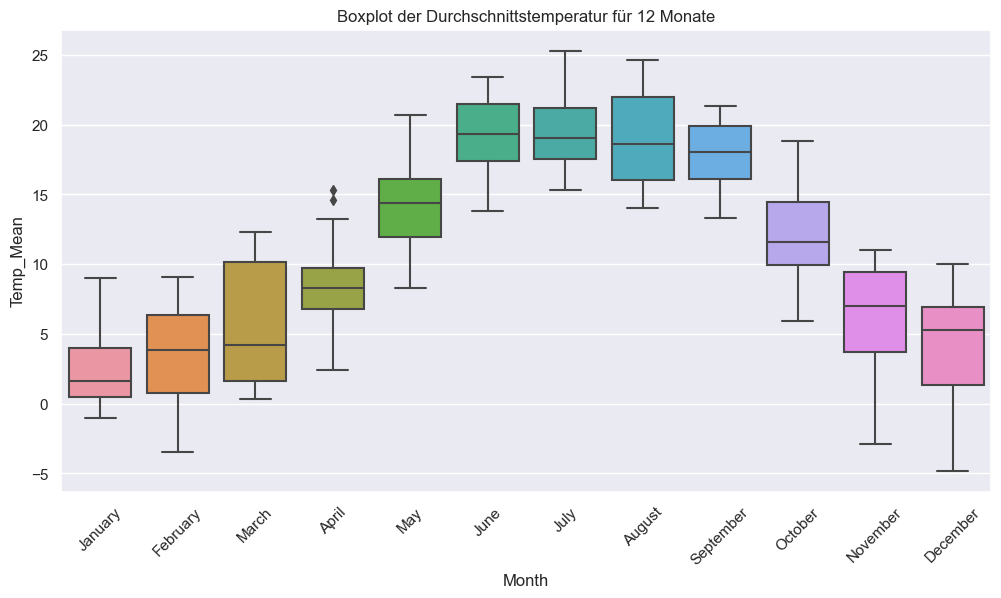

In [19]:
#Visualisierung der Temperatur in Dahlem
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temp_Mean', data=Dahlem_reset)
plt.xticks(rotation=45)
plt.title('Boxplot der Durchschnittstemperatur für 12 Monate')
plt.show()

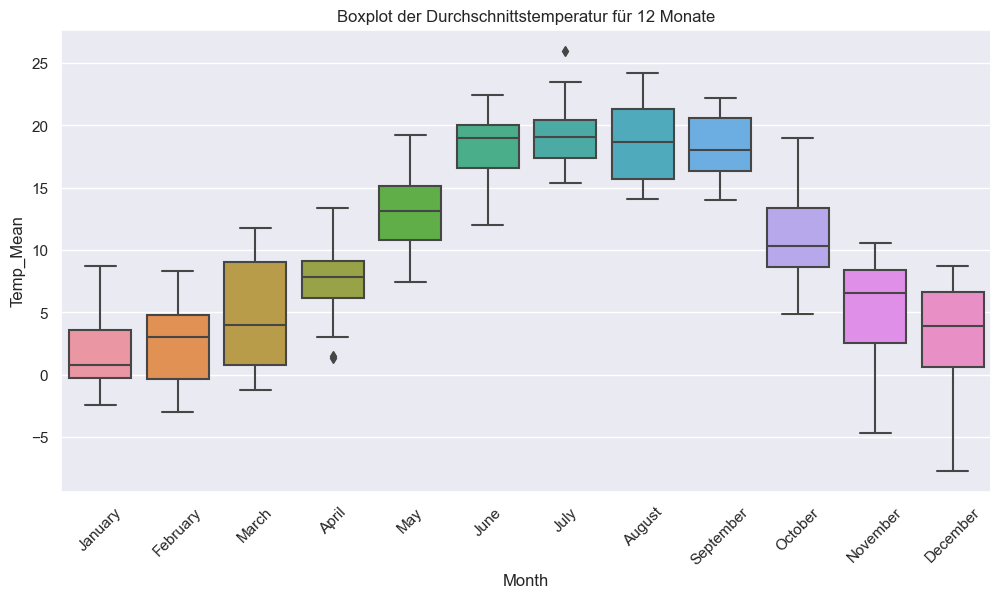

In [21]:
#Visualisierung der Temperatur in Dahlem
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temp_Mean', data=Angermünde_reset)
plt.xticks(rotation=45)
plt.title('Boxplot der Durchschnittstemperatur für 12 Monate')
plt.show()

#### Berechnung und Visualsierung der Monats- und Wochenmitteltemperaturen

##### Dahlem

In [23]:
#Datensatz Monatsmittel erstellen 
data_columns = ['Temp_Mean']
Dahlem_Monatsmittel = Dahlem[data_columns].resample('M').mean()
Dahlem_Monatsmittel.head(12)

,Temp_Mean
Date,
2023-01-31,2.352632
2023-02-28,3.317857
2023-03-31,5.896774
2023-04-30,8.243333
2023-05-31,14.177419
2023-06-30,19.293333
2023-07-31,19.541935
2023-08-31,19.196774
2023-09-30,17.853333


<Axes: xlabel='Date'>

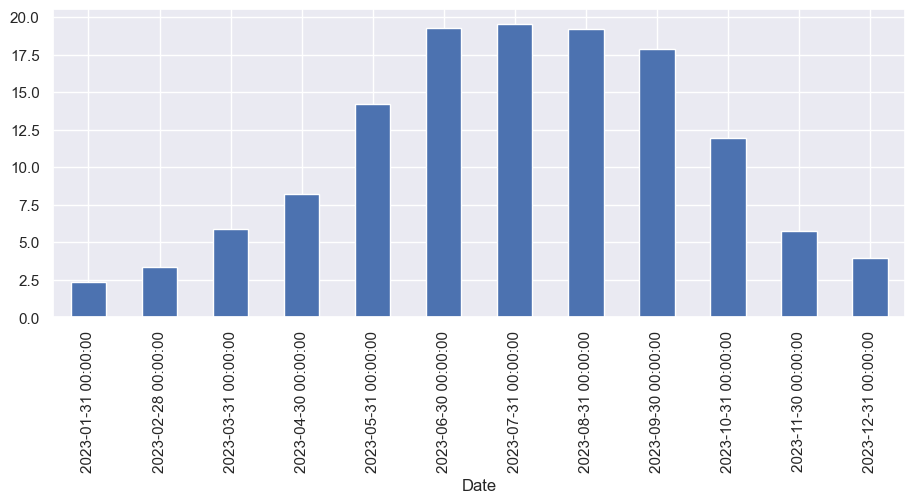

In [25]:
#Erstellung eines Balkendiagramms der Monatsmitteltemperatur
Dahlem['Temp_Mean'].resample('M').mean().plot(kind='bar')

In [27]:
#Datensatz für Wochenmittel erstellen 
data_columns = ['Temp_Mean']
Dahlem_Wochenmittel = Dahlem[data_columns].resample('W').mean()
Dahlem_Wochenmittel.head(12)

,Temp_Mean
Date,
2023-01-15,7.533333
2023-01-22,1.257143
2023-01-29,0.757143
2023-02-05,2.928571
2023-02-12,0.757143
2023-02-19,5.671429
2023-02-26,4.928571
2023-03-05,1.271429
2023-03-12,1.485714


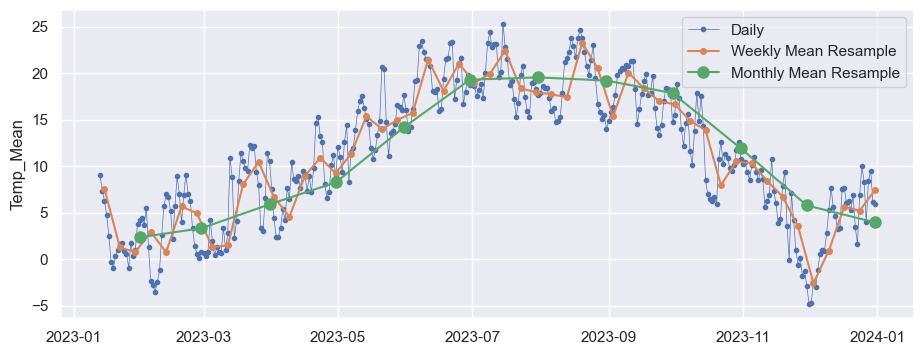

In [29]:
#Tasges- Wochen und Monatsmittel in einem Diagramm darstellen
start, end = '2023-01', '2023-12'

fig, ax = plt.subplots()
ax.plot(Dahlem.loc[start:end, 'Temp_Mean'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(Dahlem_Wochenmittel.loc[start:end, 'Temp_Mean'],marker='o', markersize=4, linestyle='-', label='Weekly Mean Resample')
ax.plot(Dahlem_Monatsmittel.loc[start:end, 'Temp_Mean'],marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Temp_Mean')
ax.legend();

##### Angermünde

In [31]:
#Datensatz für Monatsmittel erstellen 
data_columns = ['Temp_Mean']
Angermünde_Monatsmittel = Angermünde[data_columns].resample('M').mean()
Angermünde_Monatsmittel.head(12)


,Temp_Mean
Date,
2023-01-31,1.789474
2023-02-28,2.439286
2023-03-31,5.074194
2023-04-30,7.466667
2023-05-31,13.193548
2023-06-30,18.213333
2023-07-31,19.193548
2023-08-31,18.816129
2023-09-30,18.036667


<Axes: xlabel='Date'>

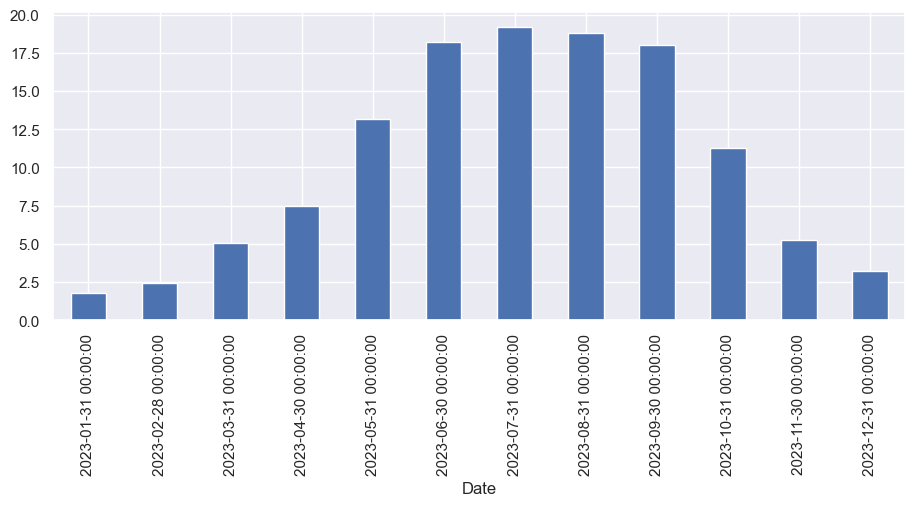

In [33]:
#Datensatz im Balkendiagramm anzeigen  
Angermünde['Temp_Mean'].resample('M').mean().plot(kind='bar')

In [35]:
#Datensatz für Wochenmittel erstellen 
data_columns = ['Temp_Mean']
Angermünde_Wochenmittel = Angermünde[data_columns].resample('W').mean()
Angermünde_Wochenmittel.head(12)

,Temp_Mean
Date,
2023-01-15,7.400000
2023-01-22,0.528571
2023-01-29,0.128571
2023-02-05,2.128571
2023-02-12,0.800000
2023-02-19,4.057143
2023-02-26,3.928571
2023-03-05,0.357143
2023-03-12,0.700000


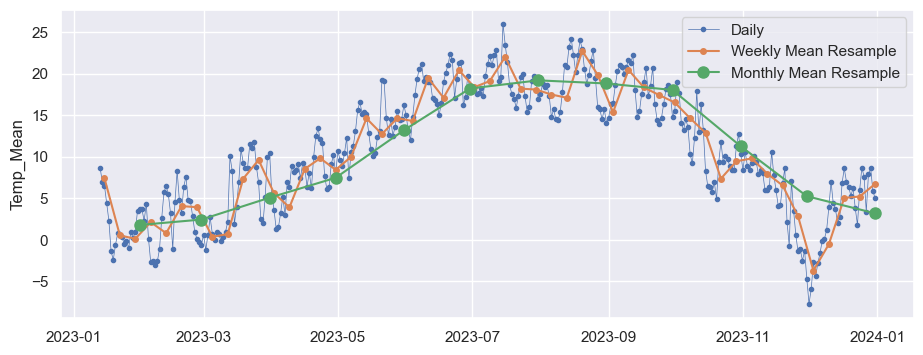

In [37]:
# Tages-, Wochen und Monatsmittel in einem Diagramm darstellen
start, end = '2023-01', '2023-12'

fig, ax = plt.subplots()
ax.plot(Angermünde.loc[start:end, 'Temp_Mean'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(Angermünde_Wochenmittel.loc[start:end, 'Temp_Mean'],marker='o', markersize=4, linestyle='-', label='Weekly Mean Resample')
ax.plot(Angermünde_Monatsmittel.loc[start:end, 'Temp_Mean'],marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Temp_Mean')
ax.legend();

#### Vergleich der Monatsmittel von Dahlem und Angermünde

In [39]:
#Datensatz für beide Standorte gemeinsam erstellen
Monatsmittel = pd.concat([Dahlem_Monatsmittel, Angermünde_Monatsmittel], axis=1)
Monatsmittel.columns = ['Dahlem_Monatsmittel', 'Angermünde_Monatsmittel']
print(Monatsmittel)

            Dahlem_Monatsmittel  Angermünde_Monatsmittel
Date                                                    
2023-01-31             2.352632                 1.789474
2023-02-28             3.317857                 2.439286
2023-03-31             5.896774                 5.074194
2023-04-30             8.243333                 7.466667
2023-05-31            14.177419                13.193548
2023-06-30            19.293333                18.213333
2023-07-31            19.541935                19.193548
2023-08-31            19.196774                18.816129
2023-09-30            17.853333                18.036667
2023-10-31            11.909677                11.254839
2023-11-30             5.776667                 5.250000
2023-12-31             3.951613                 3.190323


Nach einer ersten visuelle Analyse fallen die Differenzen der Temperaturen auf. Für eine vereinfachte Auswertung wird nachfolgend eine Spalte hinzugefügt, die die Temperaturdifferenz direkt anzeigt. 

In [41]:
#Datensatz erstellen der auch die Temperaturdifferenzen anzeigt
Monatsmittel['Temp_Diff'] = Monatsmittel['Dahlem_Monatsmittel'] - Monatsmittel['Angermünde_Monatsmittel']
Monatsmittel

Monatsmittel = Monatsmittel.round(2)
Monatsmittel

,Dahlem_Monatsmittel,Angermünde_Monatsmittel,Temp_Diff
Date,,,
2023-01-31,2.35,1.79,0.56
2023-02-28,3.32,2.44,0.88
2023-03-31,5.90,5.07,0.82
2023-04-30,8.24,7.47,0.78
2023-05-31,14.18,13.19,0.98
2023-06-30,19.29,18.21,1.08
2023-07-31,19.54,19.19,0.35
2023-08-31,19.20,18.82,0.38
2023-09-30,17.85,18.04,-0.18


Die neu erzeugte Spalte zeigt, dass die durchschnittliche Luftemperatur in Dahlem in jedem Monat höher und lediglich in einem Monat niedriger ist.

Für die erweiterte Analyse, welche Monate die stärksten und welche die geringsten Temperaturunterschiede aufweisen kann mithilfe des folgenden Codes gearbeitet werden:

In [43]:
#Anzeige maximale Temperaturdifferenz
max_diff_index = Monatsmittel['Temp_Diff'].idxmax()
max_diff_index

Timestamp('2023-06-30 00:00:00')

In [45]:
#Anzeige minimale Temperaturdifferenz
min_diff_index = Monatsmittel['Temp_Diff'].idxmin()
min_diff_index

Timestamp('2023-09-30 00:00:00')

Erste Auswertung: Im Juni sind die Unterschiede der monatlichen Durchschnittstemperatur am stärksten, im September am geringsten. 

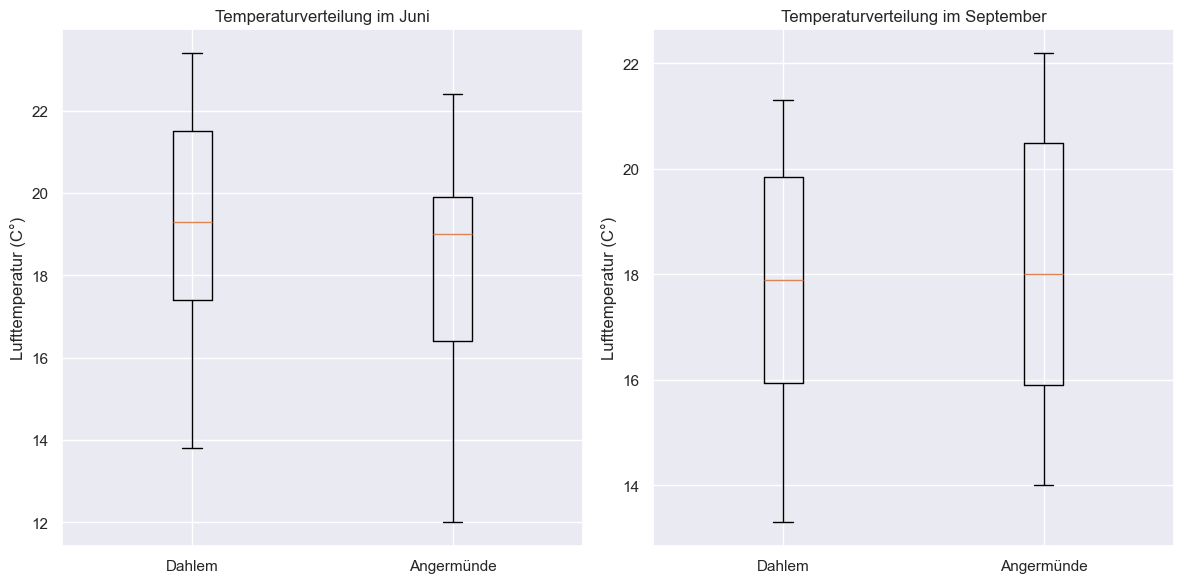

In [47]:
#zwei Datensätze für Juni und September erstellen um maximale und minimale Temperaturunterschiede genauer zu untersuchen
Angermünde_Juni = Angermünde['2023-05-31':'2023-06-30']
Dahlem_Juni = Dahlem['2023-05-31':'2023-06-30']
Angermünde_September = Angermünde['2023-08-31':'2023-09-30']
Dahlem_September = Dahlem['2023-08-31':'2023-09-30']

#die Unterschiede der maximalen und minimalen Temperaturunterschiede in einem Boxplot darstellen
#Einstellung der Abbildungsgröße
plt.figure(figsize=(12, 6))

#Boxplot für den Monat mit dem maximalen Temperaturunterschied
plt.subplot(1, 2, 1)
plt.boxplot([Dahlem_Juni['Temp_Mean'], Angermünde_Juni['Temp_Mean']], labels=['Dahlem', 'Angermünde'])
plt.ylabel('Lufttemperatur (C°)')
plt.title(f'Temperaturverteilung im Juni')

#Boxplot für den Monat mit dem minimalen Temperaturunterschied
plt.subplot(1, 2, 2)
plt.boxplot([Dahlem_September['Temp_Mean'], Angermünde_September['Temp_Mean']], labels=['Dahlem', 'Angermünde'])
plt.ylabel('Lufttemperatur (C°)')
plt.title(f'Temperaturverteilung im September')

plt.tight_layout()
plt.show()

Der maximale Temperaturunterschied zwischen Dahlem und Angermünde findet im Juni 2023 statt, der minimalste Temperaturunterschied hingegen im September 2023. 

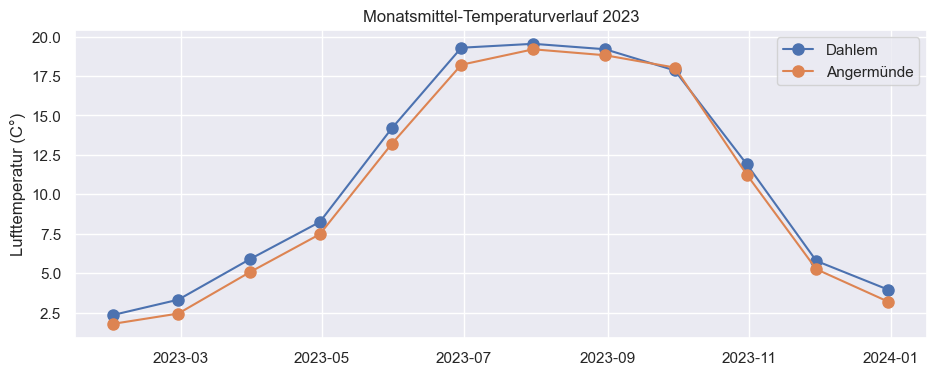

In [49]:
#Monatsmittel im Kurvendiagramm vergleichen
start, end = '2023-01', '2023-12'

fig, ax = plt.subplots()
ax.plot(Dahlem_Monatsmittel.loc[start:end, 'Temp_Mean'],marker='o', markersize=8, linestyle='-', label='Dahlem')
ax.plot(Angermünde_Monatsmittel.loc[start:end, 'Temp_Mean'],marker='o', markersize=8, linestyle='-', label='Angermünde')
ax.set_ylabel('Temp_Mean')
plt.title('Monatsmittel-Temperaturverlauf 2023')
plt.ylabel('Lufttemperatur (C°)')
ax.legend();

#### Visualisierung der Diffenz des Temperaturunterschiedes von Dahlem und Angermünde

In [51]:
# Zusammefügen der Datensätze Dahlem & Angermünde
Differenz = pd.merge(Dahlem, Angermünde, left_index=True, right_index=True, how='inner')

In [53]:
# Umbenennung der Spalten 
Differenz.columns = ['Temp_Dahlem','Temp_Angermünde']

In [55]:
# Berechnung der täglichen Differenzen 
Differenz['Temp_Diff'] = Differenz['Temp_Dahlem'] - Differenz['Temp_Angermünde']
Differenz

,Temp_Dahlem,Temp_Angermünde,Temp_Diff
Date,,,
2023-01-13,9.0,8.7,0.3
2023-01-14,7.3,7.0,0.3
2023-01-15,6.3,6.5,-0.2
2023-01-16,4.7,4.4,0.3
2023-01-17,2.5,2.3,0.2
...,...,...,...
2023-12-27,4.0,3.4,0.6
2023-12-28,8.4,7.9,0.5
2023-12-29,9.5,8.6,0.9


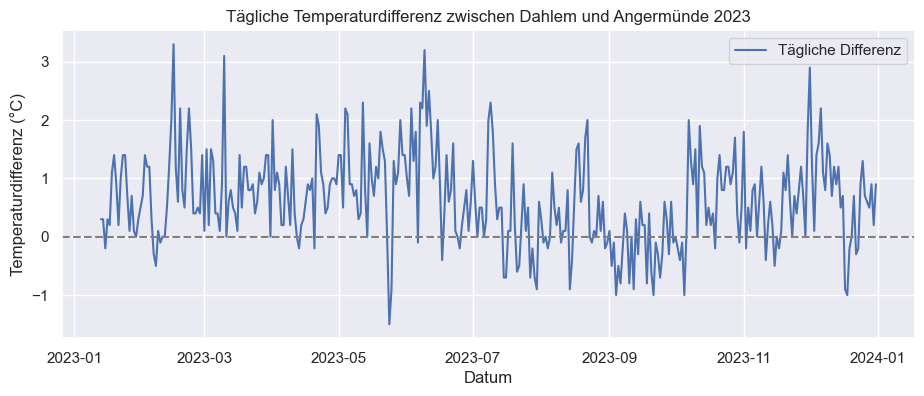

In [57]:
# Plotten der täglichen Temperaturdifferenz in einer Zeitreihe
plt.plot(Differenz.index, Differenz['Temp_Diff'], label='Tägliche Differenz')
plt.title('Tägliche Temperaturdifferenz zwischen Dahlem und Angermünde 2023')
plt.xlabel('Datum')
plt.ylabel('Temperaturdifferenz (°C)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.show()

### Schlussfolgerung

Mithilfe der Zeitreihenanalyse konnten die Foschungsfragen dieser Arbeit beantwortet werden. Tatsächlich lässt sich der Effekt der urbanen Hitzeinsel anhand der Temperaturdaten aus dem Jahr 2023 zwischen den Wetterstationen Berlin-Dahlem (städtischer Standort) und Angermünde (ländlicher Standort) identifizieren. Obwohl die Wetterstationen nur 101 km voneinander entfernt liegen, zeigen die Daten, dass in Berlin in elf von zwölf Monaten eine höhere Lufttemperatur herrscht als in Angermünde. Die dichte Bebauung und der Versiegelungsgrad tragen mitunter dazu bei, dass eine urbane Hitzeinsel in und über Berlin entstehen kann. Besonders sichtbar wird der UHI-Effekt und der damit verbundene Temperaturunterschied im Juni, die geringsten Abweichungen finden dagegen im September statt. Bei der Interpretation der Ergebnisse wird dennoch darauf hingewiesen, dass keine Informationen dazu vorliegen, ob die die Temperaturunterschiede der beiden Wetterstationen durch andere Faktoren begründet werden könnten. 





### Literatur

Calvin, Katherine, Dipak Dasgupta, Gerhard Krinner, Aditi Mukherji, Peter W. Thorne, Christopher Trisos, José Romero, u. a. (2023). „IPCC, 2023: Climate Change 2023: Synthesis Report. Contribution of Working Groups I, II and III to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, H. Lee and J. Romero (Eds.)]. IPCC, Geneva, Switzerland.“ First. Intergovernmental Panel on Climate Change (IPCC). https://doi.org/10.59327/IPCC/AR6-9789291691647.

Oke, T. R., G. Mills, A. Christen, and J. A. Voogt. Urban Climates. Cambridge: Cambridge University Press (2017). „City size and the urban heat island“. Atmospheric Environment (1967) 7 (8): 769–79. https://doi.org/10.1016/0004-6981(73)90140-6.

Oginga Martins, Judith, und Ayyoob Sharifi (2022). World Cities Report 2022: Envisaging the Future of Cities. https://www.researchgate.net/profile/Judith-Oginga-Martins-2/publication/362479003_World_Cities_Report_2022_Envisaging_the_Future_of_Cities/links/62ebe42a0b37cc34476e2443/World-Cities-Report-2022-Envisaging-the-Future-of-Cities.pdf
